In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("C:\\Users\\Dell\\campusx_badhiya_wala_project_isi_folder_me_sab_h\\gurgaon_properties_missing_value_imputation.csv")


In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss residency,sector 6,0.48,5333.33,3,2,2,2.0,Moderately Old,111.0,0,0,0,0,0,0,54
1,flat,ansal housing highland park,sector 103,1.10,6242.91,3,3,3+,7.0,New Property,1500.0,0,0,0,0,0,0,87
2,flat,sapphire eighty three,sector 83,0.65,9285.71,1,1,0,6.0,Relatively New,700.0,0,0,0,0,0,0,0
3,flat,unitech the residences,sector 33,1.35,8737.86,3,4,2,8.0,Moderately Old,1398.0,0,1,0,0,0,0,49
4,flat,m3m capital,sector 113,3.25,14142.73,4,4,3+,34.0,Under Construction,2553.0,1,1,0,1,0,0,115


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 6,0.48,3,2,2,2.0,Moderately Old,111.0,0,0,0,0,0,0,54
1,flat,sector 103,1.10,3,3,3+,7.0,New Property,1500.0,0,0,0,0,0,0,87
2,flat,sector 83,0.65,1,1,0,6.0,Relatively New,700.0,0,0,0,0,0,0,0
3,flat,sector 33,1.35,3,4,2,8.0,Moderately Old,1398.0,0,1,0,0,0,0,49
4,flat,sector 113,3.25,4,4,3+,34.0,Under Construction,2553.0,1,1,0,1,0,0,115


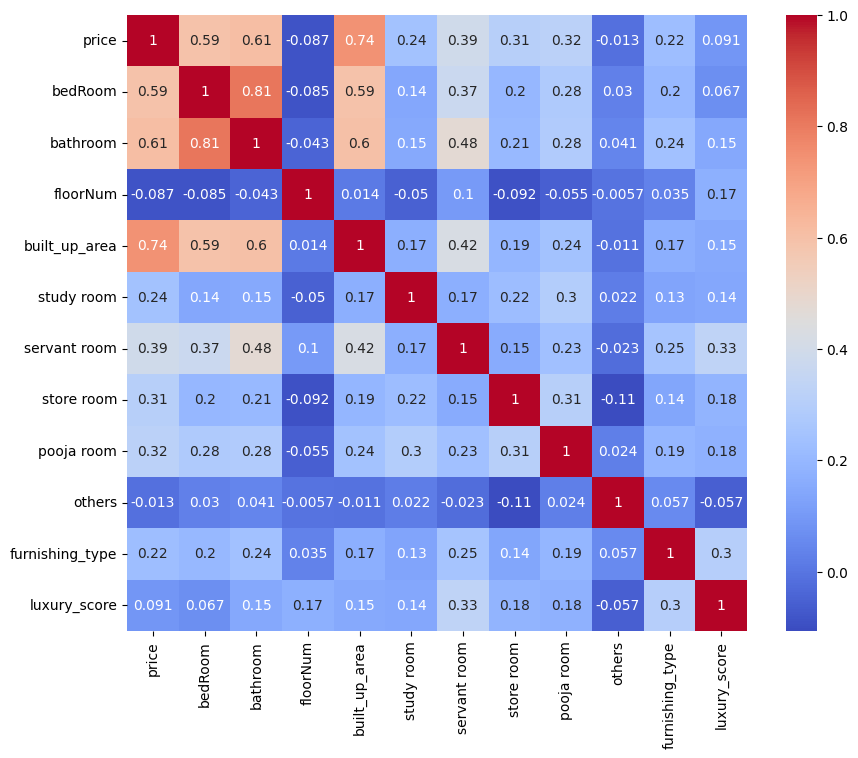

In [9]:

numeric_df = train_df.select_dtypes(include='number')


plt.figure(figsize=(10, 8))  # Optional: Adjust size
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [11]:
train_df.select_dtypes(include='number').corr()['price'].sort_values(ascending=False)


price              1.000000
built_up_area      0.744312
bathroom           0.609777
bedRoom            0.591289
servant room       0.391930
pooja room         0.319852
store room         0.305677
study room         0.242955
furnishing_type    0.224356
luxury_score       0.091473
others            -0.013064
floorNum          -0.087442
Name: price, dtype: float64

In [12]:
# cols in question

# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession